Value iteration started...


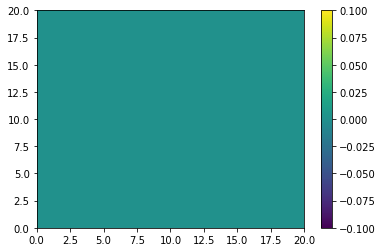

Delta: 1.0000


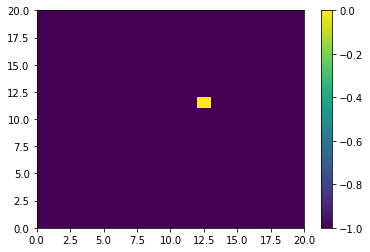

Delta: 0.9900


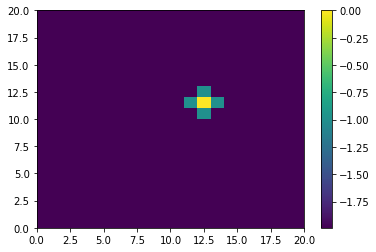

Delta: 0.9801


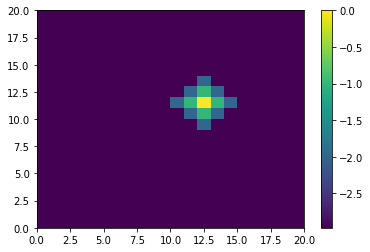

Delta: 0.9703


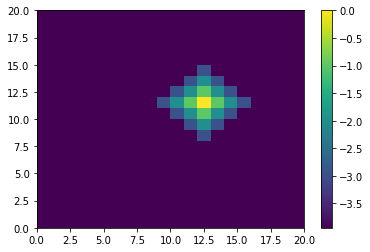

Delta: 0.9606


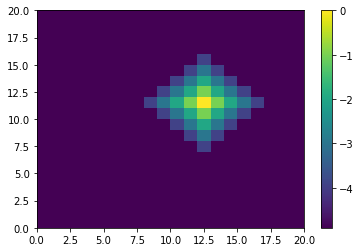

Delta: 0.9510


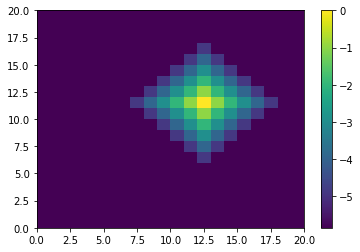

Delta: 0.9415


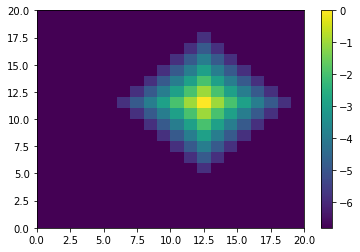

Delta: 0.9321


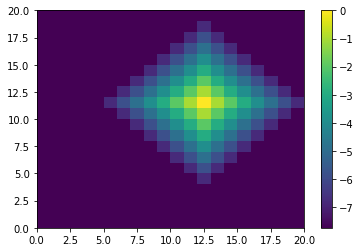

Delta: 0.9227


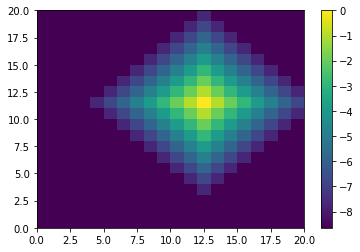

Delta: 0.9135


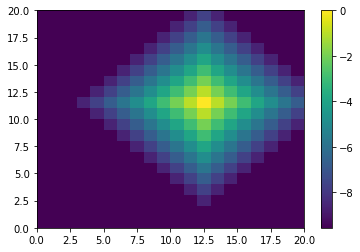

Delta: 0.9044


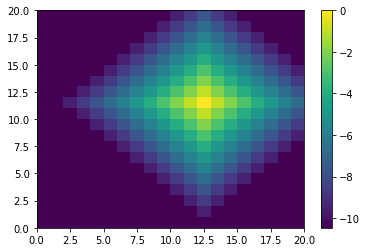

Delta: 0.8953


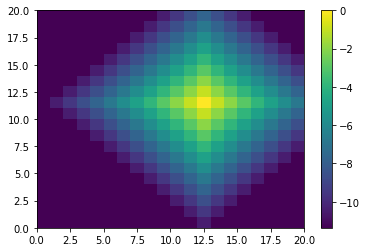

Delta: 0.8864


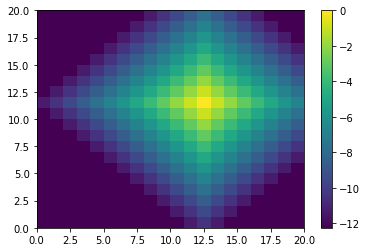

Delta: 0.8775


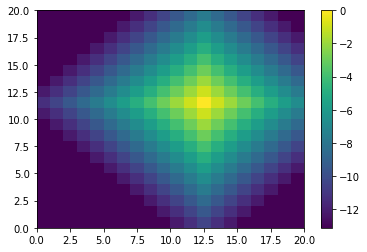

Delta: 0.8687


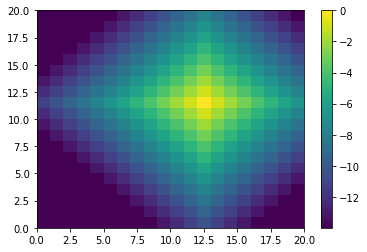

Delta: 0.8601


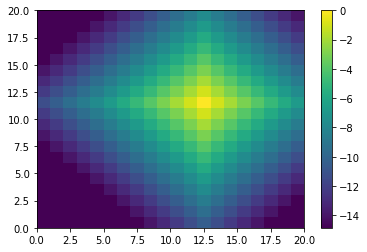

Delta: 0.8515


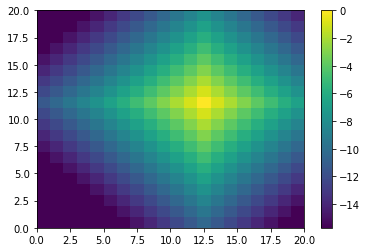

Delta: 0.8429


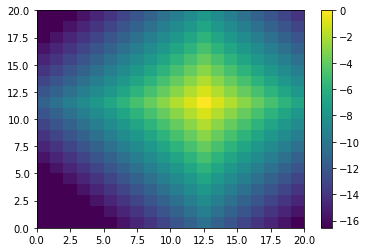

Delta: 0.8345


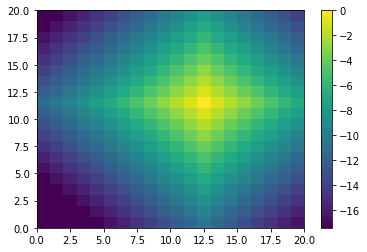

Delta: 0.8262


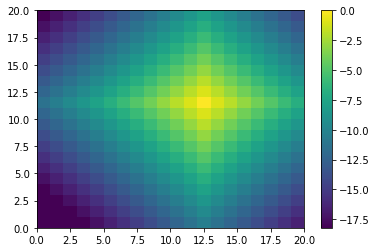

Delta: 0.8179


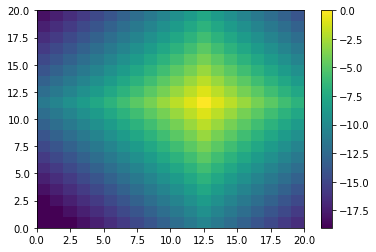

Delta: 0.8097


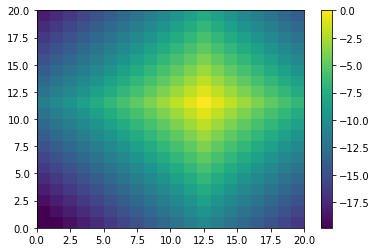

Delta: 0.8016


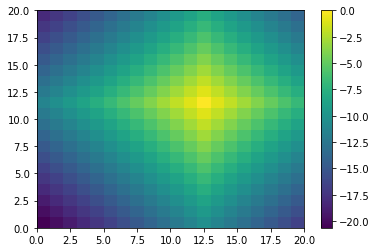

Delta: 0.0000


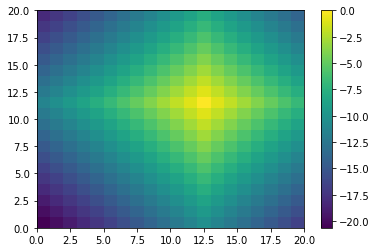

Value iteration finished!


In [2]:
import matplotlib.pyplot as plt
import numpy as np

from myelin.dp import ValueIteration, ValueIterationCallback
from myelin.mdps import GridWorld

ROWS, COLS = 20, 20
mdp = GridWorld(ROWS, COLS)
vfunction = np.zeros((ROWS, COLS))


def display():
    np.set_printoptions(precision=4, linewidth=200)
    plt.pcolormesh(vfunction)
    plt.colorbar()
    plt.show()


class Monitor(ValueIterationCallback):
    def on_learning_begin(self):
        print('Value iteration started...')
        display()

    def on_learning_end(self):
        print('Value iteration finished!')

    def on_iteration_end(self):
        display()


vi = ValueIteration(mdp, theta=0.001, gamma=0.99, vfunction=vfunction, callbacks=[Monitor()])
vi.learn()